# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.21.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1242830
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0
X

Number of samples in the MNIST dataset: 60000


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [68 46 68 63 67 46 59 63 59 61]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [68 46 68 63 67 46 59 63 59 61]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


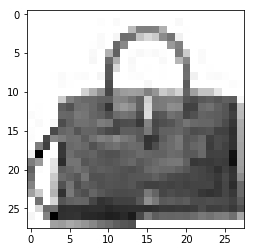

LABEL: 8
INPUT:


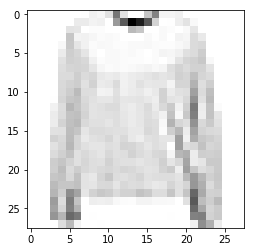

LABEL: 2
INPUT:


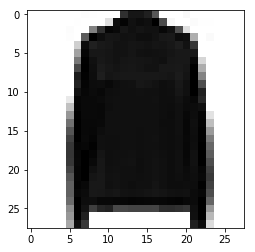

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

NN_prediction = GridSearchCV(estimator = mlp, cv = 5, param_grid = parameters)
NN_prediction.fit(X_train,y_train)

C:\Users\camilla\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.1, max_iter=250,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1242830, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [(10,), (20,), (30,

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:", NN_prediction.best_params_)
print("Score with best parameters:", NN_prediction.best_score_)
best_hl_size =  NN_prediction.best_params_.get('hidden_layer_sizes')
print("\nAll scores on the grid:")
scores = pd.DataFrame(NN_prediction.cv_results_)[['rank_test_score','param_hidden_layer_sizes','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (20,)}
Score with best parameters: 0.765

All scores on the grid:


,rank_test_score,param_hidden_layer_sizes,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
1,1,"(20,)",0.765000,0.037764,1.868541,0.119944,0.001801,4.003060e-04
2,2,"(30,)",0.748333,0.057920,1.863941,0.594689,0.002000,8.064048e-07
0,3,"(10,)",0.718333,0.073882,1.103480,0.574047,0.001200,4.000674e-04
3,4,"(20, 20)",0.711667,0.046050,1.405306,0.739536,0.002201,3.998054e-04
4,5,"(30, 30, 20)",0.576667,0.223058,1.046279,0.171877,0.002001,4.370285e-07


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]} 

# need to specify that you would like to use the standard k-fold
# split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
mlp_kf = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                       hidden_layer_sizes = best_hl_size,
                       tol=1e-4, random_state=ID,
                       learning_rate_init=.1)


# recall to use cv=kf to use the k-fold subdivision seen in the lectures
kf_prediction = GridSearchCV(estimator =  mlp_kf, cv = kf, param_grid = parameters )
kf_prediction.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(20,),
                                     learning_rate='constant',
                                     learning_rate_init=0.1, max_iter=250,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1242830, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None, para

In [11]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:", kf_prediction.best_params_)
best_batch_size = kf_prediction.best_params_.get('batch_size')
print("Best batch size found:", best_batch_size)

print("Score with best parameters:", kf_prediction.best_score_)
print("\nAll scores on the grid:")
scores = pd.DataFrame(kf_prediction.cv_results_)[['rank_test_score','param_batch_size','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'batch_size': 480}
Best batch size found: 480
Score with best parameters: 0.7283333333333334

All scores on the grid:


,rank_test_score,param_batch_size,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
2,1,480,0.728333,0.039299,1.337900,0.528532,0.001400,4.892010e-04
1,2,32,0.686667,0.041700,1.204890,0.668375,0.002001,6.328623e-04
0,3,1,0.106667,0.016159,13.048379,4.151959,0.002001,5.352484e-07


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

Our NN reaches the best performance by using a single hidden layer and the training time increases when the number of nodes of a layer increases, as we can see from the output of cell [9]. From the output of the cell above (cell [11]) we see that the best batch size is 480, for which we get the best test score. Moreover the converging time is not really the smallest, even if there is not a huge difference with other batch sizes (e.g. 32). Instead, for unitary batch size the time it takes to converge is really more.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 2.00 sec

Training MLP of size (20,) ...
Done, training time: 1.38 sec

Training MLP of size (30,) ...
Done, training time: 3.54 sec

Training MLP of size (30, 20) ...
Done, training time: 2.76 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 2.64 sec



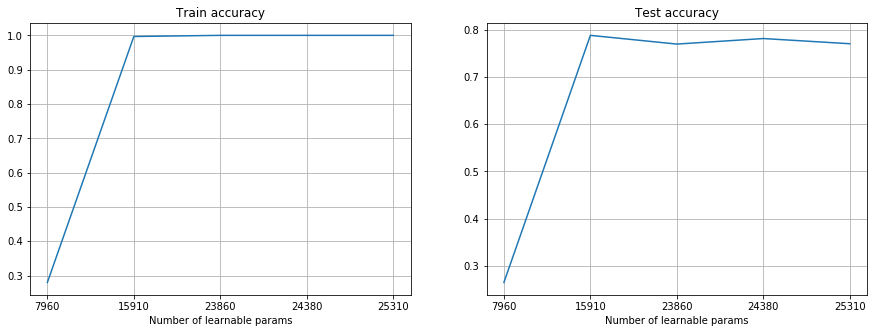

In [12]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                         hidden_layer_sizes = hl_size,
                         batch_size = best_batch_size,
                         tol=1e-4, random_state=ID,
                         learning_rate_init=.1)

    
    mlp.fit(X_train, y_train)    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

The training accuracy reached is one, while for the test, the maximum accuracy is 0.8, as we can see from the graph above. We know that a model is overfitting when the accuracy of the training set is very good and the accuracy of the test set is not as good. In the case above we cannot speak about overfitting. Instead, at the beginning we can have underfitting, since both the accuracies are very similar and poor.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

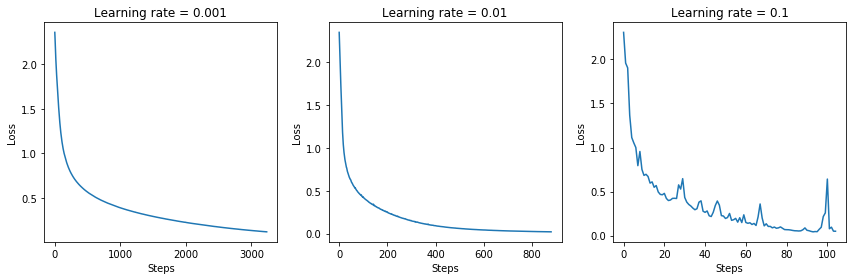

In [13]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.001, 0.01, 0.1]
#lr_list = [10**exp for exp in range(-3,0)]
loss_plot = []

fig = plt.figure(figsize=(12,4))

for lr, index in zip(lr_list, range(3)):
    mlp_lr = MLPClassifier(max_iter= 8000, alpha=1e-4, solver='sgd',
                         hidden_layer_sizes = best_hl_size,
                         batch_size = best_batch_size,
                         tol=1e-4, random_state=ID,
                         learning_rate_init = lr)
     # if max_iter is 600 it does not converge
        
    mlp_lr.fit(X_train, y_train)
    ax = fig.add_subplot(1,3,index+1)
    ax.set_title("Learning rate = "+str(lr))
    ax.set_xlabel("Steps")
    ax.set_ylabel("Loss")
    ax.plot(mlp_lr.loss_curve_)
    loss_plot.append(mlp_lr.loss_curve_)
    
plt.tight_layout()
plt.show()

In [14]:
parameters = {'learning_rate_init': [0.1, 0.01, 0.001]}

mlp_lr = MLPClassifier(max_iter= 8000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hl_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID )
  # if max_iter is 600 it does not converge
    
lr_predictor = GridSearchCV(estimator =  mlp_lr, cv = kf, param_grid = parameters )
lr_predictor.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:",  lr_predictor.best_params_ )
best_lr =  lr_predictor.best_params_.get('learning_rate_init')
print("Score with best parameters:", lr_predictor.best_score_)
print("\nAll scores on the grid:")
scores = pd.DataFrame(lr_predictor.cv_results_)[['rank_test_score','param_learning_rate_init','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'learning_rate_init': 0.001}
Score with best parameters: 0.7616666666666667

All scores on the grid:


,rank_test_score,param_learning_rate_init,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
2,1,0.001,0.761667,0.036362,26.173568,0.741161,0.0016,0.000489
1,2,0.01,0.748333,0.032232,9.314302,0.262438,0.0018,0.000747
0,3,0.1,0.728333,0.039299,1.321298,0.537847,0.0018,0.000400


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

As one can see from the graph of the loss vs the steps, for the biggest learning rate, 0.1 , the behaviour is unstable, in fact we see some spikes. Moreover in this latter case, the convergence is the fastest. As the learning rate decreases, the converging time increases. However the best parameter that is found is learning rate = 0.001, for which the score is higher. We can say that a good compromise between converging time and stability could be the 'middle' learning rate, 0.01.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.013333
Best NN test error: 0.218750


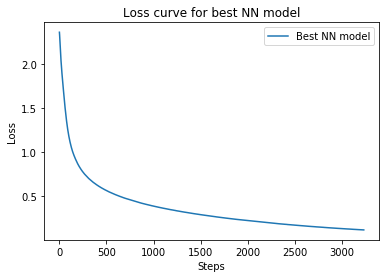

In [15]:
#get training and test error for the best NN model from CV
mlp_bestmodel = MLPClassifier(max_iter= 8000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hl_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID,
                       learning_rate_init = best_lr)
mlp_bestmodel.fit(X_train,y_train)

training_error = 1. - mlp_bestmodel.score(X_train,y_train)
test_error = 1. - mlp_bestmodel.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp_bestmodel.loss_curve_, label = "Best NN model")
plt.title("Loss curve for best NN model")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [397 423 402 390 393 391 374 394 451 385]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [17]:
# use best architecture and params from before
mlp_bestmodel_big = MLPClassifier(max_iter= 8000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hl_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID,
                       learning_rate_init = best_lr,
                       verbose=True)
mlp_bestmodel_big.fit(X_train,y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error_big = 1. - mlp_bestmodel_big.score(X_train,y_train)
test_error_big = 1. - mlp_bestmodel_big.score(X_test,y_test)

print ("NN training error: %f" % training_error_big)
print ("NN test error: %f" % test_error_big)

Iteration 1, loss = 2.38865768
Iteration 2, loss = 2.28896727
Iteration 3, loss = 2.19082513
Iteration 4, loss = 2.10595191
Iteration 5, loss = 2.03016982
Iteration 6, loss = 1.96008076
Iteration 7, loss = 1.89301359
Iteration 8, loss = 1.82925456
Iteration 9, loss = 1.76863076
Iteration 10, loss = 1.71051327
Iteration 11, loss = 1.65512112
Iteration 12, loss = 1.60348562
Iteration 13, loss = 1.55409665
Iteration 14, loss = 1.50776781
Iteration 15, loss = 1.46428566
Iteration 16, loss = 1.42341787
Iteration 17, loss = 1.38523320
Iteration 18, loss = 1.34985954
Iteration 19, loss = 1.31675470
Iteration 20, loss = 1.28608353
Iteration 21, loss = 1.25727432
Iteration 22, loss = 1.23071972
Iteration 23, loss = 1.20589251
Iteration 24, loss = 1.18298225
Iteration 25, loss = 1.16127913
Iteration 26, loss = 1.14121933
Iteration 27, loss = 1.12241729
Iteration 28, loss = 1.10480467
Iteration 29, loss = 1.08825670
Iteration 30, loss = 1.07249124
Iteration 31, loss = 1.05760069
Iteration 32, los

Iteration 255, loss = 0.51454730
Iteration 256, loss = 0.51389136
Iteration 257, loss = 0.51344270
Iteration 258, loss = 0.51274450
Iteration 259, loss = 0.51243135
Iteration 260, loss = 0.51153833
Iteration 261, loss = 0.51106503
Iteration 262, loss = 0.51057802
Iteration 263, loss = 0.51014184
Iteration 264, loss = 0.50933093
Iteration 265, loss = 0.50893128
Iteration 266, loss = 0.50843002
Iteration 267, loss = 0.50778123
Iteration 268, loss = 0.50730018
Iteration 269, loss = 0.50685039
Iteration 270, loss = 0.50624537
Iteration 271, loss = 0.50557460
Iteration 272, loss = 0.50507994
Iteration 273, loss = 0.50458665
Iteration 274, loss = 0.50414586
Iteration 275, loss = 0.50355815
Iteration 276, loss = 0.50332303
Iteration 277, loss = 0.50250292
Iteration 278, loss = 0.50198932
Iteration 279, loss = 0.50148961
Iteration 280, loss = 0.50134243
Iteration 281, loss = 0.50064311
Iteration 282, loss = 0.49992147
Iteration 283, loss = 0.49963836
Iteration 284, loss = 0.49909265
Iteration 

Iteration 506, loss = 0.42234553
Iteration 507, loss = 0.42188771
Iteration 508, loss = 0.42152923
Iteration 509, loss = 0.42141831
Iteration 510, loss = 0.42113930
Iteration 511, loss = 0.42077023
Iteration 512, loss = 0.42103182
Iteration 513, loss = 0.42035978
Iteration 514, loss = 0.42022413
Iteration 515, loss = 0.41989789
Iteration 516, loss = 0.41948988
Iteration 517, loss = 0.41934984
Iteration 518, loss = 0.41913667
Iteration 519, loss = 0.41888806
Iteration 520, loss = 0.41859162
Iteration 521, loss = 0.41843232
Iteration 522, loss = 0.41817236
Iteration 523, loss = 0.41795753
Iteration 524, loss = 0.41805426
Iteration 525, loss = 0.41727730
Iteration 526, loss = 0.41729062
Iteration 527, loss = 0.41703201
Iteration 528, loss = 0.41664806
Iteration 529, loss = 0.41628352
Iteration 530, loss = 0.41620707
Iteration 531, loss = 0.41617311
Iteration 532, loss = 0.41553877
Iteration 533, loss = 0.41588986
Iteration 534, loss = 0.41525996
Iteration 535, loss = 0.41488680
Iteration 

Iteration 755, loss = 0.37069017
Iteration 756, loss = 0.37045912
Iteration 757, loss = 0.37036630
Iteration 758, loss = 0.36985950
Iteration 759, loss = 0.36983849
Iteration 760, loss = 0.36958700
Iteration 761, loss = 0.36933256
Iteration 762, loss = 0.36914329
Iteration 763, loss = 0.36926172
Iteration 764, loss = 0.36894501
Iteration 765, loss = 0.36881673
Iteration 766, loss = 0.36864211
Iteration 767, loss = 0.36901465
Iteration 768, loss = 0.36875293
Iteration 769, loss = 0.36796240
Iteration 770, loss = 0.36786098
Iteration 771, loss = 0.36812512
Iteration 772, loss = 0.36748276
Iteration 773, loss = 0.36735489
Iteration 774, loss = 0.36700217
Iteration 775, loss = 0.36725771
Iteration 776, loss = 0.36699030
Iteration 777, loss = 0.36698095
Iteration 778, loss = 0.36659268
Iteration 779, loss = 0.36633767
Iteration 780, loss = 0.36606694
Iteration 781, loss = 0.36600233
Iteration 782, loss = 0.36586917
Iteration 783, loss = 0.36578114
Iteration 784, loss = 0.36567337
Iteration 

Iteration 1005, loss = 0.33120930
Iteration 1006, loss = 0.33124367
Iteration 1007, loss = 0.33102531
Iteration 1008, loss = 0.33112685
Iteration 1009, loss = 0.33059401
Iteration 1010, loss = 0.33090166
Iteration 1011, loss = 0.33045377
Iteration 1012, loss = 0.33032972
Iteration 1013, loss = 0.33001285
Iteration 1014, loss = 0.33008961
Iteration 1015, loss = 0.32975998
Iteration 1016, loss = 0.32988976
Iteration 1017, loss = 0.32965161
Iteration 1018, loss = 0.32941041
Iteration 1019, loss = 0.32926379
Iteration 1020, loss = 0.32948043
Iteration 1021, loss = 0.32880101
Iteration 1022, loss = 0.32910565
Iteration 1023, loss = 0.32914184
Iteration 1024, loss = 0.32873680
Iteration 1025, loss = 0.32852857
Iteration 1026, loss = 0.32833165
Iteration 1027, loss = 0.32827597
Iteration 1028, loss = 0.32823058
Iteration 1029, loss = 0.32823163
Iteration 1030, loss = 0.32784205
Iteration 1031, loss = 0.32775833
Iteration 1032, loss = 0.32757768
Iteration 1033, loss = 0.32731114
Iteration 1034

Iteration 1246, loss = 0.29999520
Iteration 1247, loss = 0.29953331
Iteration 1248, loss = 0.29972817
Iteration 1249, loss = 0.29937115
Iteration 1250, loss = 0.29936028
Iteration 1251, loss = 0.29914573
Iteration 1252, loss = 0.29910565
Iteration 1253, loss = 0.29937997
Iteration 1254, loss = 0.29877985
Iteration 1255, loss = 0.29865787
Iteration 1256, loss = 0.29856183
Iteration 1257, loss = 0.29858778
Iteration 1258, loss = 0.29858304
Iteration 1259, loss = 0.29861206
Iteration 1260, loss = 0.29820257
Iteration 1261, loss = 0.29802837
Iteration 1262, loss = 0.29811570
Iteration 1263, loss = 0.29788929
Iteration 1264, loss = 0.29770835
Iteration 1265, loss = 0.29750517
Iteration 1266, loss = 0.29755498
Iteration 1267, loss = 0.29717181
Iteration 1268, loss = 0.29716462
Iteration 1269, loss = 0.29696055
Iteration 1270, loss = 0.29686617
Iteration 1271, loss = 0.29677484
Iteration 1272, loss = 0.29679917
Iteration 1273, loss = 0.29660972
Iteration 1274, loss = 0.29691595
Iteration 1275

Iteration 1487, loss = 0.27266369
Iteration 1488, loss = 0.27251420
Iteration 1489, loss = 0.27236172
Iteration 1490, loss = 0.27216224
Iteration 1491, loss = 0.27216487
Iteration 1492, loss = 0.27202515
Iteration 1493, loss = 0.27200599
Iteration 1494, loss = 0.27189870
Iteration 1495, loss = 0.27176935
Iteration 1496, loss = 0.27202204
Iteration 1497, loss = 0.27161397
Iteration 1498, loss = 0.27147076
Iteration 1499, loss = 0.27153085
Iteration 1500, loss = 0.27124659
Iteration 1501, loss = 0.27101765
Iteration 1502, loss = 0.27100978
Iteration 1503, loss = 0.27089965
Iteration 1504, loss = 0.27073859
Iteration 1505, loss = 0.27104994
Iteration 1506, loss = 0.27078254
Iteration 1507, loss = 0.27103861
Iteration 1508, loss = 0.27051719
Iteration 1509, loss = 0.27029370
Iteration 1510, loss = 0.27013341
Iteration 1511, loss = 0.27010056
Iteration 1512, loss = 0.26998529
Iteration 1513, loss = 0.27009412
Iteration 1514, loss = 0.26995627
Iteration 1515, loss = 0.26971740
Iteration 1516

Iteration 1728, loss = 0.24868004
Iteration 1729, loss = 0.24843100
Iteration 1730, loss = 0.24823715
Iteration 1731, loss = 0.24824215
Iteration 1732, loss = 0.24834869
Iteration 1733, loss = 0.24811390
Iteration 1734, loss = 0.24803092
Iteration 1735, loss = 0.24806639
Iteration 1736, loss = 0.24764614
Iteration 1737, loss = 0.24784874
Iteration 1738, loss = 0.24760036
Iteration 1739, loss = 0.24794939
Iteration 1740, loss = 0.24752933
Iteration 1741, loss = 0.24738322
Iteration 1742, loss = 0.24714355
Iteration 1743, loss = 0.24729487
Iteration 1744, loss = 0.24729667
Iteration 1745, loss = 0.24724325
Iteration 1746, loss = 0.24670193
Iteration 1747, loss = 0.24708551
Iteration 1748, loss = 0.24677403
Iteration 1749, loss = 0.24665716
Iteration 1750, loss = 0.24660497
Iteration 1751, loss = 0.24644470
Iteration 1752, loss = 0.24620576
Iteration 1753, loss = 0.24620691
Iteration 1754, loss = 0.24625068
Iteration 1755, loss = 0.24641677
Iteration 1756, loss = 0.24613971
Iteration 1757

Iteration 1969, loss = 0.22696896
Iteration 1970, loss = 0.22695529
Iteration 1971, loss = 0.22669291
Iteration 1972, loss = 0.22673545
Iteration 1973, loss = 0.22660688
Iteration 1974, loss = 0.22652038
Iteration 1975, loss = 0.22645287
Iteration 1976, loss = 0.22653920
Iteration 1977, loss = 0.22657377
Iteration 1978, loss = 0.22623293
Iteration 1979, loss = 0.22638457
Iteration 1980, loss = 0.22592064
Iteration 1981, loss = 0.22589853
Iteration 1982, loss = 0.22572124
Iteration 1983, loss = 0.22585677
Iteration 1984, loss = 0.22564774
Iteration 1985, loss = 0.22553385
Iteration 1986, loss = 0.22542069
Iteration 1987, loss = 0.22537172
Iteration 1988, loss = 0.22519847
Iteration 1989, loss = 0.22529572
Iteration 1990, loss = 0.22514801
Iteration 1991, loss = 0.22496051
Iteration 1992, loss = 0.22497358
Iteration 1993, loss = 0.22498450
Iteration 1994, loss = 0.22495320
Iteration 1995, loss = 0.22471084
Iteration 1996, loss = 0.22468390
Iteration 1997, loss = 0.22487173
Iteration 1998

Iteration 2210, loss = 0.20788113
Iteration 2211, loss = 0.20773636
Iteration 2212, loss = 0.20754626
Iteration 2213, loss = 0.20750212
Iteration 2214, loss = 0.20709475
Iteration 2215, loss = 0.20727960
Iteration 2216, loss = 0.20756131
Iteration 2217, loss = 0.20728232
Iteration 2218, loss = 0.20691560
Iteration 2219, loss = 0.20677836
Iteration 2220, loss = 0.20678759
Iteration 2221, loss = 0.20653640
Iteration 2222, loss = 0.20702898
Iteration 2223, loss = 0.20669204
Iteration 2224, loss = 0.20676421
Iteration 2225, loss = 0.20623933
Iteration 2226, loss = 0.20624012
Iteration 2227, loss = 0.20602114
Iteration 2228, loss = 0.20603941
Iteration 2229, loss = 0.20605183
Iteration 2230, loss = 0.20611462
Iteration 2231, loss = 0.20594339
Iteration 2232, loss = 0.20577228
Iteration 2233, loss = 0.20587954
Iteration 2234, loss = 0.20559652
Iteration 2235, loss = 0.20566113
Iteration 2236, loss = 0.20574939
Iteration 2237, loss = 0.20546634
Iteration 2238, loss = 0.20538192
Iteration 2239

Iteration 2453, loss = 0.18959635
Iteration 2454, loss = 0.18968416
Iteration 2455, loss = 0.18953737
Iteration 2456, loss = 0.18941947
Iteration 2457, loss = 0.18958007
Iteration 2458, loss = 0.18959110
Iteration 2459, loss = 0.18903510
Iteration 2460, loss = 0.18915688
Iteration 2461, loss = 0.18903746
Iteration 2462, loss = 0.18921606
Iteration 2463, loss = 0.18913848
Iteration 2464, loss = 0.18899814
Iteration 2465, loss = 0.18963643
Iteration 2466, loss = 0.18879921
Iteration 2467, loss = 0.18896917
Iteration 2468, loss = 0.18877980
Iteration 2469, loss = 0.18858754
Iteration 2470, loss = 0.18847207
Iteration 2471, loss = 0.18826843
Iteration 2472, loss = 0.18828205
Iteration 2473, loss = 0.18832113
Iteration 2474, loss = 0.18819463
Iteration 2475, loss = 0.18853674
Iteration 2476, loss = 0.18798918
Iteration 2477, loss = 0.18809233
Iteration 2478, loss = 0.18785760
Iteration 2479, loss = 0.18807017
Iteration 2480, loss = 0.18775527
Iteration 2481, loss = 0.18773230
Iteration 2482

Iteration 2694, loss = 0.17447556
Iteration 2695, loss = 0.17364618
Iteration 2696, loss = 0.17383099
Iteration 2697, loss = 0.17340032
Iteration 2698, loss = 0.17377706
Iteration 2699, loss = 0.17373191
Iteration 2700, loss = 0.17320710
Iteration 2701, loss = 0.17350957
Iteration 2702, loss = 0.17355847
Iteration 2703, loss = 0.17326401
Iteration 2704, loss = 0.17291746
Iteration 2705, loss = 0.17292215
Iteration 2706, loss = 0.17278145
Iteration 2707, loss = 0.17303299
Iteration 2708, loss = 0.17282106
Iteration 2709, loss = 0.17281085
Iteration 2710, loss = 0.17290318
Iteration 2711, loss = 0.17265196
Iteration 2712, loss = 0.17250660
Iteration 2713, loss = 0.17256383
Iteration 2714, loss = 0.17254712
Iteration 2715, loss = 0.17236892
Iteration 2716, loss = 0.17234542
Iteration 2717, loss = 0.17225670
Iteration 2718, loss = 0.17209200
Iteration 2719, loss = 0.17241491
Iteration 2720, loss = 0.17206652
Iteration 2721, loss = 0.17222066
Iteration 2722, loss = 0.17187913
Iteration 2723

Iteration 2936, loss = 0.15917546
Iteration 2937, loss = 0.15914031
Iteration 2938, loss = 0.15898264
Iteration 2939, loss = 0.15883767
Iteration 2940, loss = 0.15918615
Iteration 2941, loss = 0.15866162
Iteration 2942, loss = 0.15875666
Iteration 2943, loss = 0.15881253
Iteration 2944, loss = 0.15913974
Iteration 2945, loss = 0.15843518
Iteration 2946, loss = 0.15861025
Iteration 2947, loss = 0.15841309
Iteration 2948, loss = 0.15832434
Iteration 2949, loss = 0.15844096
Iteration 2950, loss = 0.15851835
Iteration 2951, loss = 0.15817271
Iteration 2952, loss = 0.15820090
Iteration 2953, loss = 0.15817420
Iteration 2954, loss = 0.15786618
Iteration 2955, loss = 0.15800046
Iteration 2956, loss = 0.15800543
Iteration 2957, loss = 0.15798913
Iteration 2958, loss = 0.15816216
Iteration 2959, loss = 0.15764126
Iteration 2960, loss = 0.15784352
Iteration 2961, loss = 0.15789815
Iteration 2962, loss = 0.15767380
Iteration 2963, loss = 0.15769925
Iteration 2964, loss = 0.15735281
Iteration 2965

Iteration 3179, loss = 0.14562445
Iteration 3180, loss = 0.14557138
Iteration 3181, loss = 0.14550531
Iteration 3182, loss = 0.14554264
Iteration 3183, loss = 0.14525860
Iteration 3184, loss = 0.14548063
Iteration 3185, loss = 0.14526347
Iteration 3186, loss = 0.14542911
Iteration 3187, loss = 0.14513514
Iteration 3188, loss = 0.14511692
Iteration 3189, loss = 0.14505798
Iteration 3190, loss = 0.14508774
Iteration 3191, loss = 0.14496867
Iteration 3192, loss = 0.14478092
Iteration 3193, loss = 0.14471630
Iteration 3194, loss = 0.14482735
Iteration 3195, loss = 0.14482204
Iteration 3196, loss = 0.14479481
Iteration 3197, loss = 0.14454459
Iteration 3198, loss = 0.14486109
Iteration 3199, loss = 0.14502072
Iteration 3200, loss = 0.14435553
Iteration 3201, loss = 0.14458790
Iteration 3202, loss = 0.14439758
Iteration 3203, loss = 0.14424622
Iteration 3204, loss = 0.14411010
Iteration 3205, loss = 0.14439937
Iteration 3206, loss = 0.14418800
Iteration 3207, loss = 0.14413128
Iteration 3208

Iteration 3422, loss = 0.13370174
Iteration 3423, loss = 0.13373331
Iteration 3424, loss = 0.13327419
Iteration 3425, loss = 0.13336712
Iteration 3426, loss = 0.13324993
Iteration 3427, loss = 0.13292699
Iteration 3428, loss = 0.13312608
Iteration 3429, loss = 0.13288514
Iteration 3430, loss = 0.13292071
Iteration 3431, loss = 0.13276475
Iteration 3432, loss = 0.13318816
Iteration 3433, loss = 0.13304156
Iteration 3434, loss = 0.13317209
Iteration 3435, loss = 0.13290718
Iteration 3436, loss = 0.13251693
Iteration 3437, loss = 0.13258234
Iteration 3438, loss = 0.13258487
Iteration 3439, loss = 0.13234693
Iteration 3440, loss = 0.13260255
Iteration 3441, loss = 0.13234880
Iteration 3442, loss = 0.13211032
Iteration 3443, loss = 0.13270537
Iteration 3444, loss = 0.13205661
Iteration 3445, loss = 0.13233271
Iteration 3446, loss = 0.13252619
Iteration 3447, loss = 0.13197345
Iteration 3448, loss = 0.13198187
Iteration 3449, loss = 0.13184919
Iteration 3450, loss = 0.13195074
Iteration 3451

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

For both cases (smaller and bigger training set) the training error is smaller than the test error, and this is expected from the theory. However we have that with the larger training set the training error is a little bigger, i.e. some points are missclassified during the training. This is not an issue, on the contrary we can conclude that with the bigger training set the performance is better, and this is clear from the test error. Of course with a bigger training set, also the training time becomes larger.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


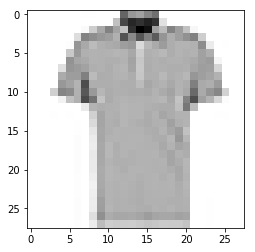

LABEL: 0


In [18]:
NN_prediction = mlp_bestmodel.predict(X_test)
large_NN_prediction = mlp_bestmodel_big.predict(X_test)

missclass = [i for i in range(len(NN_prediction)) if (NN_prediction[i]
     != large_NN_prediction[i] and large_NN_prediction[i] == y_test[i])]
rand_miss = np.random.choice(missclass)
plot_input(X_test, y_test, rand_miss)

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


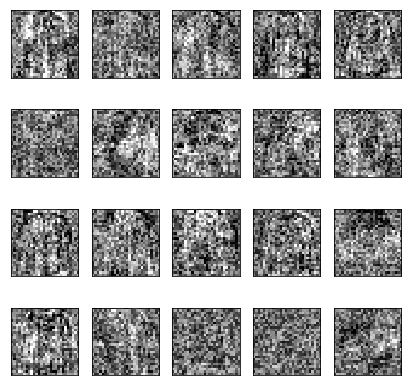

Weights with 4000 data points:


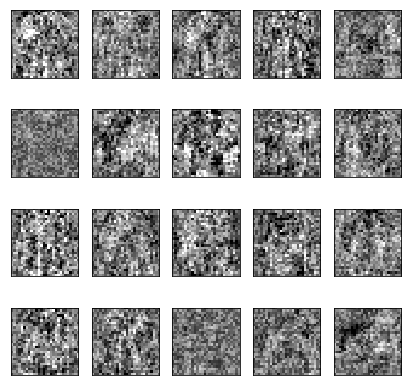

In [19]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 5, figsize=(7,7)) 
vmin, vmax = mlp_bestmodel.coefs_[0].min(), mlp_bestmodel.coefs_[0].max()
for coef, ax in zip(mlp_bestmodel.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(()) 
    ax.set_yticks(()) 

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 5, figsize=(7,7))

vmin, vmax = mlp_bestmodel_big.coefs_[0].min(), mlp_bestmodel_big.coefs_[0].max()
for coef, ax in zip(mlp_bestmodel_big.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

One can observe that the weights do not show any structure or labeled pattern. This happens for both the training sets.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [29]:
m_training = 4000 # here there was 5000, I have changed it in order to compare
                  # with the method above (NN with larger training set)

#X_train, X_test = X[:m_training], X[m_training:2*m_training] 
#y_train, y_test = y[:m_training], y[m_training:2*m_training]

X_train, X_test = X[:m_training], X[m_training:]  # Also here I use the partition in training and test set
y_train, y_test = y[:m_training], y[m_training:]  # used before, in order to do the comparison

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(kernel = 'rbf', C = 5, gamma = 0.005)
best_SVM.fit(X_train, y_train)
SVM_prediction = best_SVM.predict(X_test)

print ('RESULTS FOR SVM')

SVM_training_error =  1. - best_SVM.score(X_train,y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1. - best_SVM.score(X_test,y_test)
print("Test error SVM:")
print(SVM_test_error)

print('\nRESULTS FOR NN (larger dataset)')
print("Training error:", training_error_big)
print("Test error:", test_error_big)

#print('\nRESULTS FOR NN (smaller dataset)')  # I do not care about the smaller training set,
#print("Training error:", training_error)     # since I have already stated that the bigger one is better
#print("Test error:", test_error )

RESULTS FOR SVM
Training error SVM:
0.06999999999999995
Test error SVM:
0.1481607142857143

RESULTS FOR NN (larger dataset)
Training error: 0.030000000000000027
Test error: 0.1711785714285714


In [30]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(solver = 'newton-cg', C = 1 , multi_class='auto', max_iter=1e3)
regL2.fit(X_train, y_train)
regL2_prediction = regL2.predict(X_test)
# you can re-use your code from Lab 2

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1. - regL2.score(X_train,y_train)
test_error = 1. - regL2.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.038250
Test error (reg): 0.179607



 Confusion matrix NN (larger dataset)


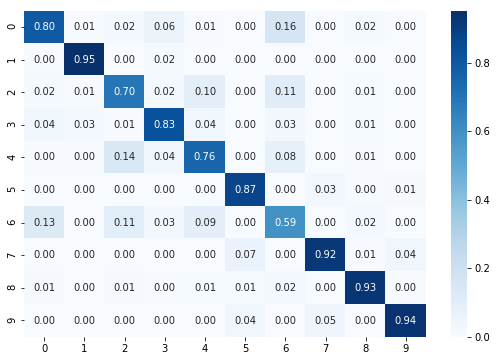


 Confusion matrix SVM


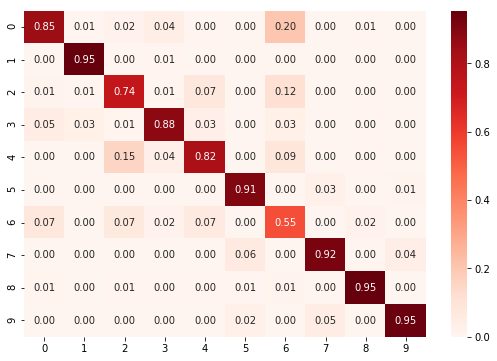


 Confusion matrix Logistic Regression


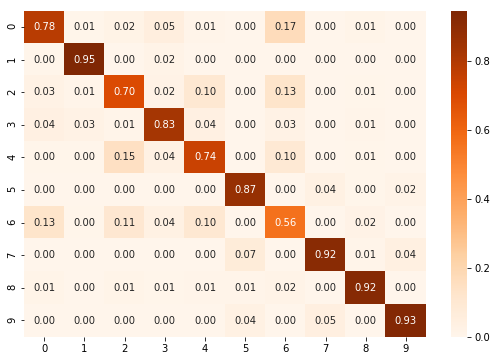

In [31]:
import sklearn.metrics as skm

u, counts = np.unique(y_test, return_counts=True)

confusion_SVM = skm.confusion_matrix(SVM_prediction, y_test) 
confusion_regL2 = skm.confusion_matrix(regL2_prediction, y_test)
#confusion_NN = skm.confusion_matrix(NN_prediction, y_test)
confusion_NN_large = skm.confusion_matrix(large_NN_prediction, y_test) 

#print("\n Confusion matrix NN (smaller dataset)")
#plt.figure(figsize = (9,6))
#sns.heatmap(confusion_NN/counts[:,None], annot=True, fmt =  "1.2f" , cmap="Greens" )
#plt.show()

print("\n Confusion matrix NN (larger dataset)")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_NN_large/counts[:,None], annot=True, fmt =  "1.2f" , cmap="Blues" )
plt.show()

print("\n Confusion matrix SVM")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_SVM/counts[:,None], annot=True, fmt = "1.2f" , cmap="Reds" )
plt.show()

print("\n Confusion matrix Logistic Regression")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_regL2/counts[:,None], annot=True, fmt =  "1.2f" , cmap="Oranges" )
plt.show()

## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

Comparing the confusion matrices, we can see that the SVM is generally the best. In fact comparing tha diagonals of the matrices, i.e. the objects that are correclty classified, the percentages in the confusion matrix of SVM are generally higher. Also the test error of the SVM method is the smallest.